In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd_ndvi = pd.read_csv('ndvi.csv')
pd_fpar = pd.read_csv('mod15_par.csv')

# Merge the two dataframes
merged_df = pd.merge(pd_ndvi, pd_fpar, on=['name', 'year', 'month'])

# Create a new column for the date in the format mm/yyyy
merged_df['date'] = merged_df['month'].astype(str).str.zfill(2) + '/' + merged_df['year'].astype(str)

merged_df

,name,year,month,ndvi,fpar,date
0,Sundarbans,2014,1,0.513323,1.281407,01/2014
1,Sundarbans,2014,2,0.516879,1.268216,02/2014
2,Sundarbans,2014,3,0.495644,1.224626,03/2014
3,Sundarbans,2014,4,0.441487,1.174795,04/2014
4,Sundarbans,2014,5,0.337192,1.119773,05/2014
...,...,...,...,...,...,...
283,Can Gio,2019,8,0.459506,0.621427,08/2019
284,Can Gio,2019,9,0.465067,0.596933,09/2019
285,Can Gio,2019,10,0.592504,0.820689,10/2019
286,Can Gio,2019,11,0.573538,0.764857,11/2019


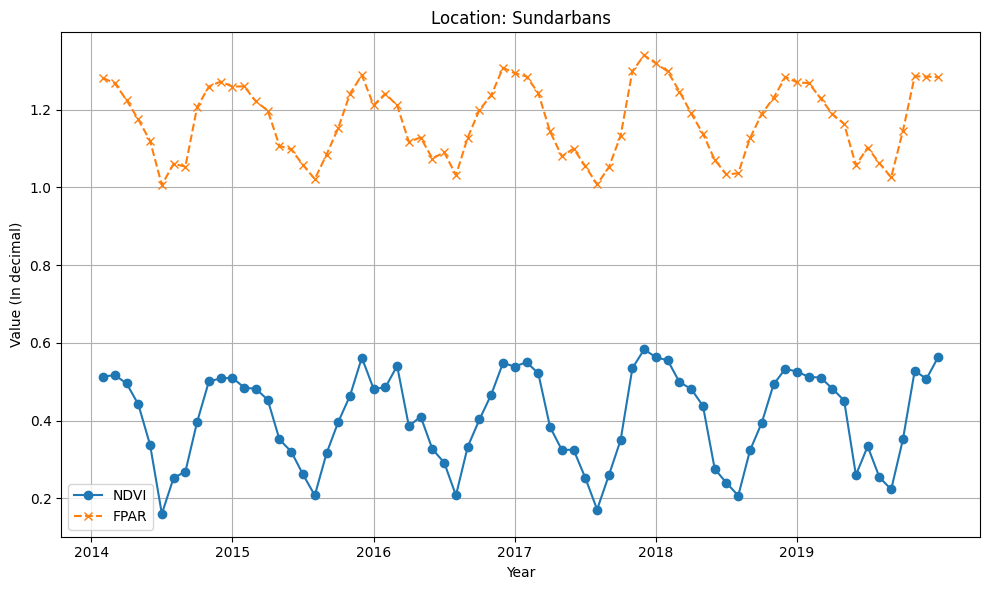

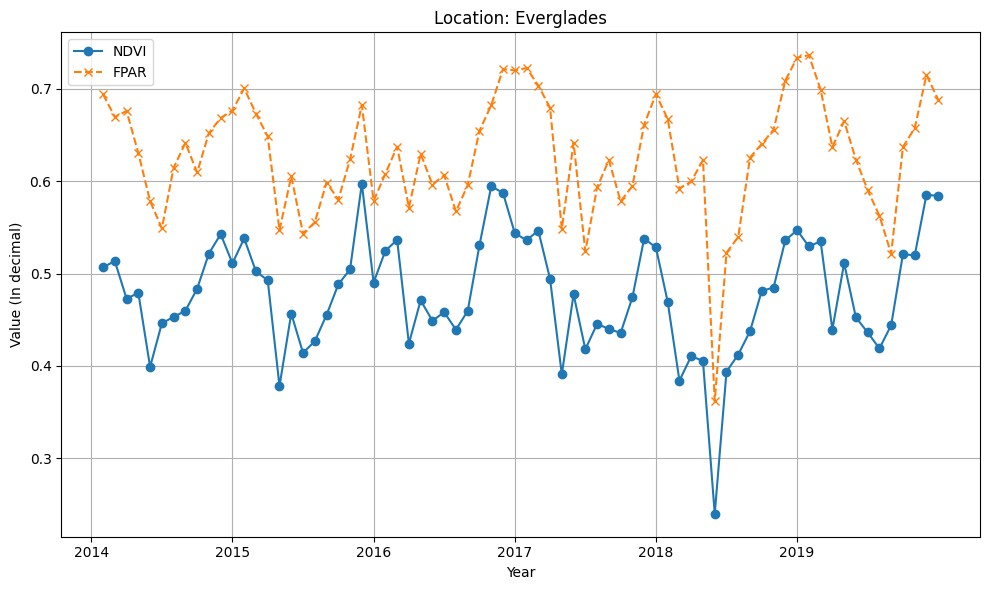

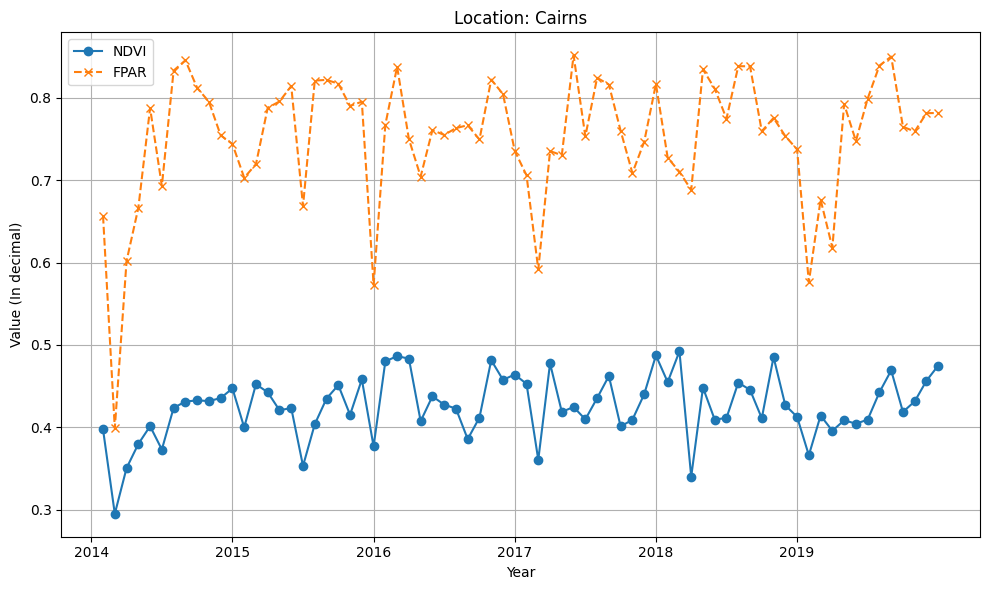

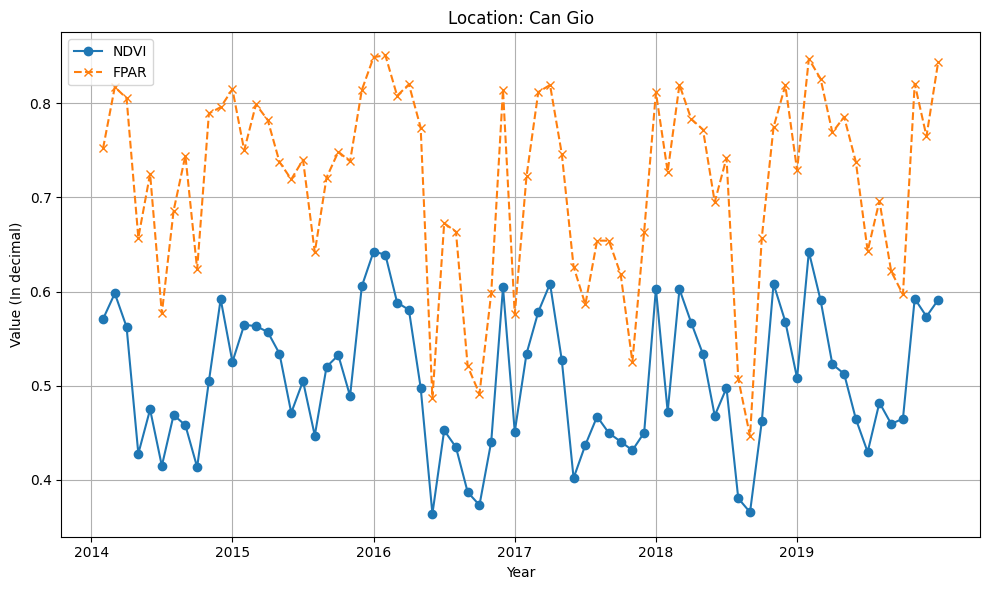

In [6]:
locations = merged_df['name'].unique()

for location in locations:
    subset = merged_df[merged_df['name'] == location]
    
    plt.figure(figsize=(10, 6))
    plt.plot(subset['year'] + subset['month'] / 12, subset['ndvi'], label='NDVI', marker='o')
    plt.plot(subset['year'] + subset['month'] / 12, subset['fpar'], label='FPAR', linestyle='--', marker='x')
    plt.title(f'Location: {location}')
    plt.xlabel('Year')
    plt.ylabel('Value (In decimal)')
    plt.legend()
    plt.grid(True)
    plt.xticks(subset['year'].unique())  # This ensures only unique years are shown
    plt.tight_layout()
    plt.show()
